Matplotlib is building the font cache; this may take a moment.

<Figure size 1200x300 with 4 Axes>

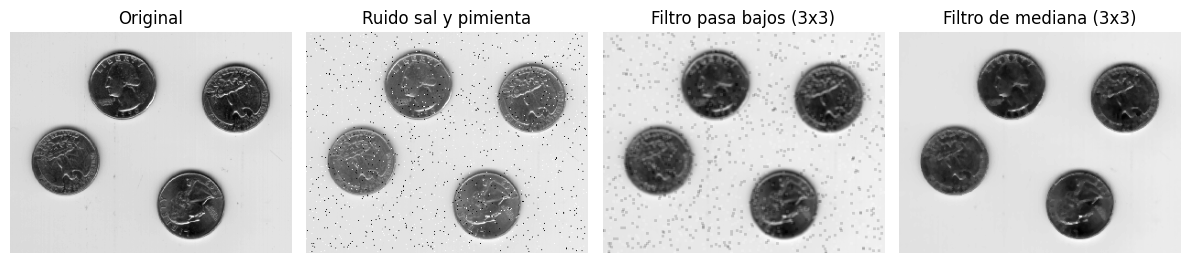

In [1]:
# === Reproducción del código MATLAB en JupyterLite ===
# I = imread('eight.tif');
# J = imnoise(I,'salt & pepper',0.02);
# K = filter2(fspecial('average',3),J)/255;
# L = medfilt2(J,[3 3]);

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# --- Leer imagen ---
img_path = "eight.tif"  # ruta al archivo subido
I = Image.open(img_path).convert("L")  # convertir a escala de grises
I_arr = np.array(I, dtype=np.float32)

# --- Mostrar original ---
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.imshow(I_arr, cmap="gray")
plt.title("Original")
plt.axis("off")

# --- Agregar ruido sal y pimienta (densidad 0.02) ---
def salt_and_pepper(image, amount=0.02):
    noisy = image.copy()
    num_salt = np.ceil(amount * image.size * 0.5)
    num_pepper = np.ceil(amount * image.size * 0.5)

    # coordenadas aleatorias para sal
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # coordenadas aleatorias para pimienta
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

J = salt_and_pepper(I_arr, 0.02)
plt.subplot(1, 4, 2)
plt.imshow(J, cmap="gray")
plt.title("Ruido sal y pimienta")
plt.axis("off")

# --- Filtro pasa bajos promedio 3x3 ---
kernel = np.ones((3, 3), dtype=np.float32) / 9

def convolve2d(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

K = convolve2d(J, kernel) / 255.0  # normalización
plt.subplot(1, 4, 3)
plt.imshow(K, cmap="gray")
plt.title("Filtro pasa bajos (3x3)")
plt.axis("off")

# --- Filtro de mediana 3x3 ---
def median_filter(image, size=3):
    pad = size // 2
    padded = np.pad(image, pad, mode='reflect')
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+size, j:j+size]
            output[i, j] = np.median(region)
    return output

L = median_filter(J, 3)
plt.subplot(1, 4, 4)
plt.imshow(L, cmap="gray")
plt.title("Filtro de mediana (3x3)")
plt.axis("off")

plt.tight_layout()
plt.show()

In [2]:
"""
1. Imagen original (I)
Se carga la imagen eight.tif y se convierte a escala de grises.
Visualización: imagen limpia, sin ruido.

2. Ruido sal y pimienta (J)
Se agrega ruido “sal y pimienta” con densidad 0.02 (2% de los píxeles se vuelven 
completamente blancos o negros).
Visualización: aparecen puntos blancos y negros dispersos sobre la imagen original.

3. Filtro pasa bajos promedio 3x3 (K)
Se aplica un filtro de promedio (convolución con una matriz 3×3 donde cada elemento es 1/9).
Efecto: suaviza la imagen, reduce algo de ruido, pero los puntos de “sal y pimienta” 
muy intensos no se eliminan completamente.
Visualización: la imagen se ve más borrospa, 
el contraste de los bordes se atenúa, el ruido se reduce parcialmente.

4. Filtro de mediana 3x3 (L)
Se aplica un filtro de mediana en una ventana 3×3.
Efecto: elimina eficazmente los puntos de “sal y pimienta” porque reemplaza cada 
píxel con la mediana de sus vecinos, preservando bordes.
Visualización: la imagen se ve limpia, los bordes se conservan mejor que con el promedio, 
y el ruido puntual desaparece casi por completo.
"""